In [1]:
!pip install requests

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    "vs_currency": "usd",
    "days": "365",
    "interval": "daily"
}
response = requests.get(url, params=params)
data = response.json()
timestamps = [entry[0] for entry in data["prices"]]
prices = [entry[1] for entry in data["prices"]]
df = pd.DataFrame({"Date": pd.to_datetime(timestamps, unit="ms"), "Price": prices})
df.set_index("Date", inplace=True)
print(df.head())
df.to_csv("bitcoin_prices.csv")

                   Price
Date                    
2024-03-19  67708.943609
2024-03-20  62132.517379
2024-03-21  67819.055707
2024-03-22  65535.978448
2024-03-23  63509.044965


Text(0.5, 1.0, 'Bitcoin Price Trend (Last 1 Year)')

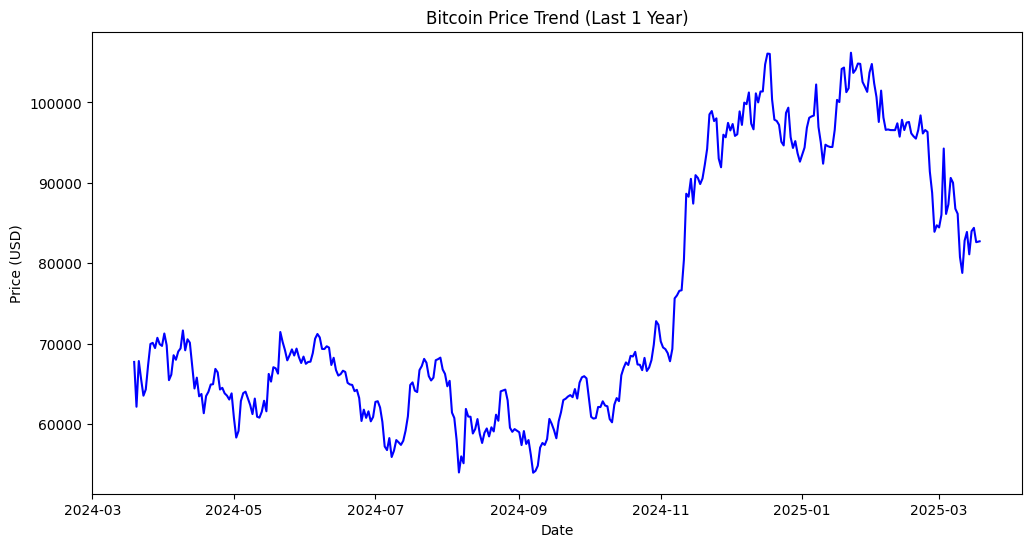

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Bitcoin Price (USD)", color="blue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Trend (Last 1 Year)")

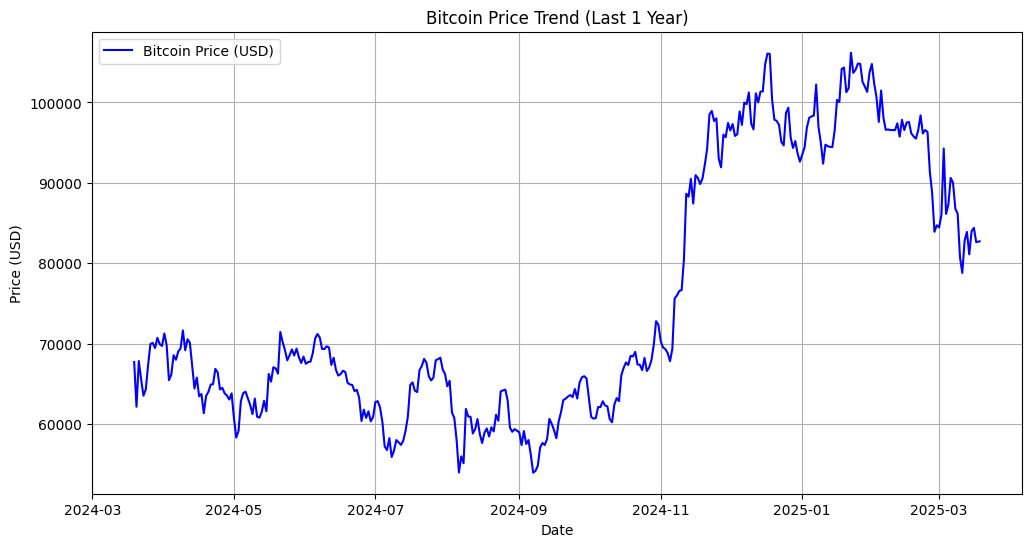

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Bitcoin Price (USD)", color="blue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Trend (Last 1 Year)")
plt.legend()
plt.grid()
plt.show()

In [5]:
!pip install statsmodels tensorflow keras prophet

In [6]:
!pip uninstall -y numpy
!pip install numpy==1.26.4  # Install a stable version

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
print("✅ NumPy & Dependencies are working fine!")

✅ NumPy & Dependencies are working fine!


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/content/bitcoin_prices.csv", parse_dates=['Date'], index_col='Date')
print(df.head())

                   Price
Date                    
2024-03-19  67708.943609
2024-03-20  62132.517379
2024-03-21  67819.055707
2024-03-22  65535.978448
2024-03-23  63509.044965


In [9]:
#Train ARIMA Model
model_arima = ARIMA(df['Price'], order=(5,1,0))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

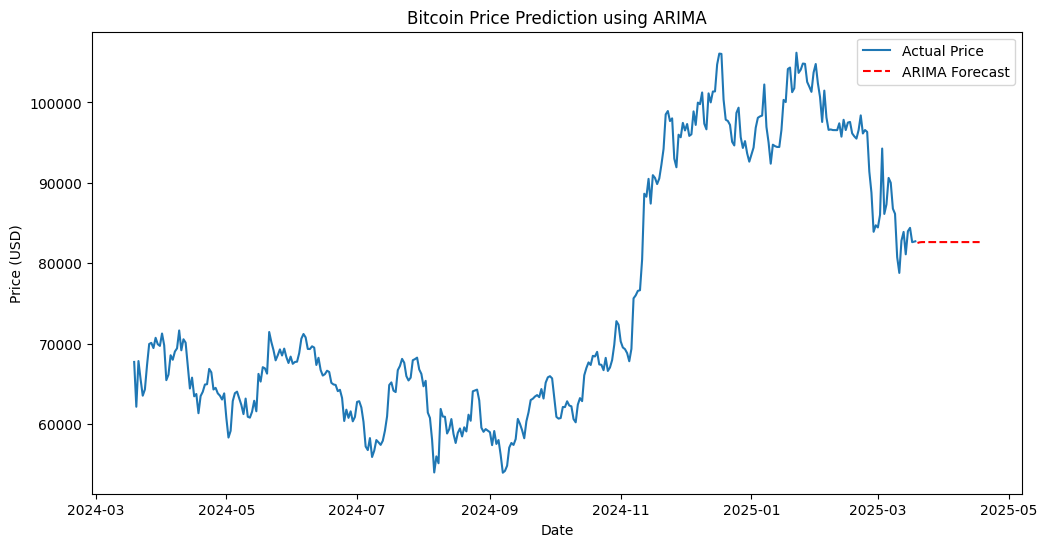

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Actual Price")
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], forecast_arima, label="ARIMA Forecast", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Prediction using ARIMA")
plt.legend()
plt.show()

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Price"].values.reshape(-1,1))
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [12]:
time_step = 60
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [13]:
#Build and train LSTM Model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model_lstm.compile(optimizer="adam", loss="mean_squared_error")
model_lstm.fit(X_train, Y_train, batch_size=1, epochs=10)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0116
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0063
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0056
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0050
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0037
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0026
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0028
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0034
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0023
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0018


In [15]:
#forecast with LSTM predict last 30 days
X_input = scaled_data[-time_step:].reshape(1, time_step, 1)
lstm_predictions = []

for _ in range(30):
    pred = model_lstm.predict(X_input)
    lstm_predictions.append(pred[0,0])
    X_input = np.append(X_input[:,1:,:], pred.reshape(1,1,1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

In [16]:
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1,1))

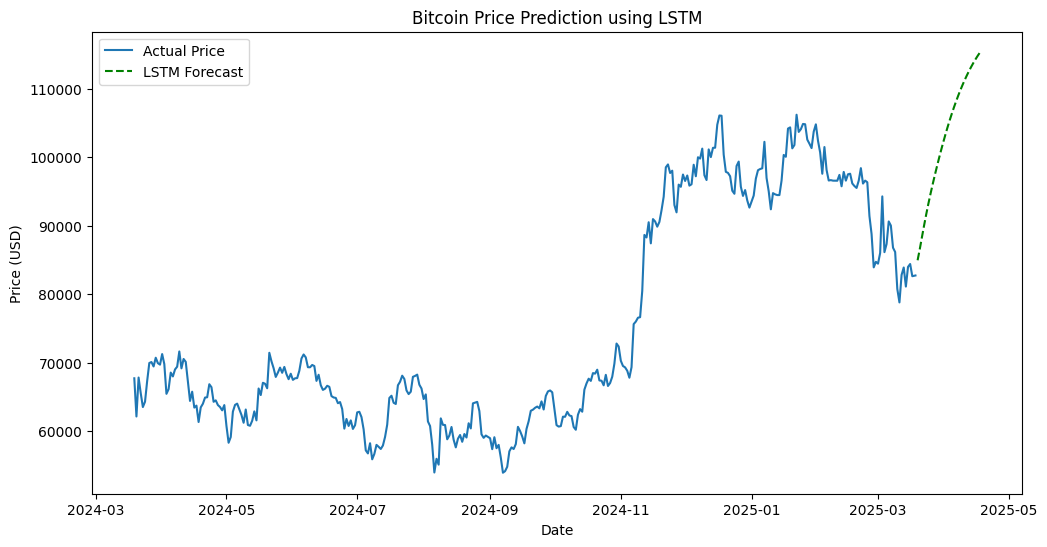

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price"], label="Actual Price")
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], lstm_predictions, label="LSTM Forecast", linestyle="dashed", color="green")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Prediction using LSTM")
plt.legend()
plt.show()

In [18]:
#Forecasting with facebook prophet
#prepare data for prophet
df_prophet = df.reset_index()[['Date', 'Price']]
df_prophet.columns = ['ds', 'y']

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/gfg22uyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/_vv5lhs0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15071', 'data', 'file=/tmp/tmpp3xq4abl/gfg22uyj.json', 'init=/tmp/tmpp3xq4abl/_vv5lhs0.json', 'output', 'file=/tmp/tmpp3xq4abl/prophet_modelk97dc1gh/prophet_model-20250318112118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


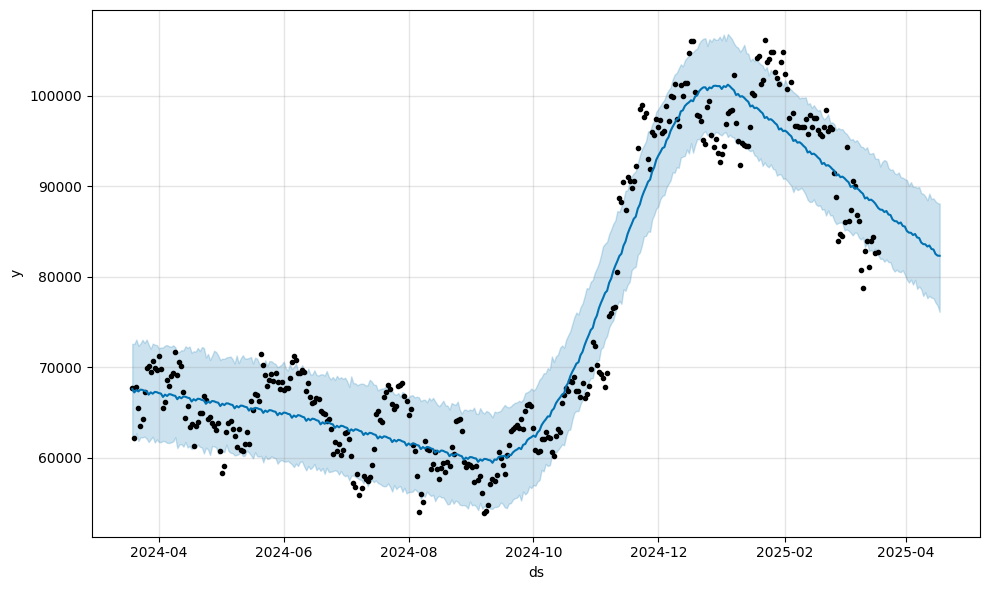

In [19]:
#train prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)
model_prophet.plot(forecast)
plt.show()

In [20]:
#Evaluate Model Performance
from sklearn.metrics import mean_squared_error
import numpy as np

In [21]:
arima_rmse = np.sqrt(mean_squared_error(df['Price'][-30:], forecast_arima))
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 8192.084229533655


In [22]:
lstm_rmse = np.sqrt(mean_squared_error(df['Price'][-30:], lstm_predictions))
print(f"LSTM RMSE: {lstm_rmse}")

LSTM RMSE: 20532.956974768196


In [23]:
prophet_rmse = np.sqrt(mean_squared_error(df['Price'][-30:].values, forecast['yhat'][-30:].values))
print(f"Prophet RMSE: {prophet_rmse}")

Prophet RMSE: 5751.7772947973635


In [24]:
!pip uninstall -y pmdarima numpy
!pip install numpy==1.26.4  # Downgrade NumPy to a compatible version
!pip install pmdarima --no-cache-dir

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 168.0 MB/s eta 0:00:00


In [25]:
import pmdarima
print("✅ pmdarima installed and working!")

✅ pmdarima installed and working!


In [26]:
#Tune the Models for Better Predictions
#ARIMA Hyperparameter Tuning (find the best p, d, q)
#LSTM Hyperparameter Tuning (adjust layers, neurons, epochs)
#Prophet Seasonal Adjust
!pip uninstall numpy -y
!pip install numpy
from pmdarima import auto_arima

auto_model = auto_arima(df['Price'], seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3286.550
Date:                Tue, 18 Mar 2025   AIC                           6581.101
Time:                        11:21:58   BIC                           6596.689
Sample:                             0   HQIC                          6587.296
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.2194    154.509      0.338      0.735    -250.613     355.051
ar.L1         -0.5328      0.213     -2.498      0.012      -0.951      -0.115
ma.L1          0.4472      0.237      1.889      0.0

In [27]:
import time
import requests

# Set the number of iterations you want the loop to run for
max_iterations = 5

for i in range(max_iterations):
    response = requests.get("https://api.coingecko.com/api/v3/simple/price", params={"ids": "bitcoin", "vs_currencies": "usd"})

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        btc_price = response.json()["bitcoin"]["usd"]
        print(f"Live Bitcoin Price: ${btc_price}")  # This line prints the price
    else:
        print(f"Error fetching price: Status code {response.status_code}") # This line prints an error

    time.sleep(10)  # Wait 10 seconds before fetching again to avoid rate limiting

print("Loop finished.")

Live Bitcoin Price: $82711
Live Bitcoin Price: $82711
Live Bitcoin Price: $82711
Live Bitcoin Price: $82704
Live Bitcoin Price: $82704
Loop finished.


In [28]:
#Deploy as a webapp in streamlit
!pip install streamlit
import streamlit as st

st.title("Bitcoin Price Forecasting")

# Show actual price chart
st.line_chart(df['Price'])

# Show ARIMA forecast
st.line_chart(forecast_arima)

# Show LSTM forecast
st.line_chart(lstm_predictions)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


2025-03-18 11:22:54.816 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:55.234 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-18 11:22:55.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.323 Thread 'MainThread': mi

DeltaGenerator()

In [29]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

Writing app.py


In [30]:
df = pd.read_csv("/content/bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

In [31]:
st.title("Bitcoin Price Forecasting")

2025-03-18 11:22:56.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [32]:
# Show Historical Data
st.subheader("Bitcoin Price Data")
st.write(df.tail())

# Plot Actual Prices
st.subheader("Bitcoin Price Trend")
st.line_chart(df["Price"])

2025-03-18 11:22:56.384 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [33]:
# ARIMA Forecast Plot
st.subheader("ARIMA Forecast")
# Adjust the periods in pd.date_range to 31 and keep [1:] to get 30 periods to match forecast_arima
st.line_chart(pd.concat([df["Price"].iloc[-30:], pd.Series(forecast_arima.values, index=pd.date_range(start=df.index[-1], periods=31, freq="D")[1:])]))

2025-03-18 11:22:56.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [34]:
st.subheader("LSTM Forecast")
st.line_chart(pd.concat([df["Price"].iloc[-30:], pd.Series(lstm_predictions.flatten(), index=pd.date_range(start=df.index[-1], periods=31, freq="D")[1:])]))
# Change periods to 31 to generate 30 dates after excluding the first with [1:]

2025-03-18 11:22:56.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:22:56.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [35]:
!pip install pyngrok
!pip install streamlit pyngrok

In [ ]:
!ngrok authtoken 2uBKFFrECRNBHqLtXYKuRepg7tk_6drokNi5jKGReR2aoAdzZ

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
# Load Bitcoin Price Data
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Streamlit UI
st.title("📈 Bitcoin Price Forecasting")
# Show Historical Data
st.subheader("Bitcoin Price Data")
st.write(df.tail())

# Plot Actual Prices
st.subheader("Bitcoin Price Trend")
st.line_chart(df["Price"])

st.write("Built with Streamlit")

In [39]:
import threading
import subprocess
from pyngrok import ngrok

# Kill old processes (if any)
!kill -9 $(pgrep streamlit)
!killall ngrok # Kill all ngrok instances before starting a new one

# Start Streamlit in a separate thread
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501", "--browser.serverAddress", "0.0.0.0"])

thread = threading.Thread(target=run_streamlit)
thread.start()

# Start ngrok to expose the Streamlit app
# Use try-except block to handle potential errors
try:
    public_url = ngrok.connect(addr="8501")
    print(f"Streamlit App is Running at: {public_url}")
except Exception as e:
    print(f"An error occurred: {e}")
    # You can add more error handling logic here, like retrying or stopping the script

kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
ngrok: no process found
Streamlit App is Running at: NgrokTunnel: "https://9b5f-34-85-168-42.ngrok-free.app" -> "http://localhost:8501"


In [40]:
!ls

app.py	bitcoin_prices.csv  sample_data


In [41]:
%%writefile app.py
import streamlit as st

st.title("Bitcoin Price Forecasting")
st.write("Hello! This is a simple Streamlit app.")

Overwriting app.py


In [42]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load Bitcoin Price Data
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Streamlit UI
st.title("Bitcoin Price Forecasting")
st.write("Welcome! This dashboard shows Bitcoin price trends and predictions.")

# Show Data Preview
st.subheader("Bitcoin Price Data")
st.write(df.tail())

# Plot Bitcoin Price Trend
st.subheader("Bitcoin Price Trend")
st.line_chart(df["Price"])

st.write("Built with Streamlit")

Overwriting app.py


In [43]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load Bitcoin Price Data
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

Overwriting app.py


In [44]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load Bitcoin data
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Train ARIMA model
model_arima = ARIMA(df['Price'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast the next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Save ARIMA Predictions
df_arima_forecast = pd.DataFrame({"Date": pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], "Forecast": forecast_arima})
df_arima_forecast.to_csv("arima_forecast.csv", index=False)
print("ARIMA Forecast Saved!")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast Saved!


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load Bitcoin data
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Scale Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Price"].values.reshape(-1,1))

# Prepare Data for LSTM
time_step = 60
X, Y = [], []
for i in range(len(scaled_data) - time_step - 1):
    X.append(scaled_data[i:(i + time_step), 0])
    Y.append(scaled_data[i + time_step, 0])

X = np.array(X).reshape(-1, time_step, 1)
Y = np.array(Y)

# Train LSTM Model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model_lstm.compile(optimizer="adam", loss="mean_squared_error")
model_lstm.fit(X, Y, batch_size=1, epochs=10)

# Predict Next 30 Days
X_input = scaled_data[-time_step:].reshape(1, time_step, 1)
lstm_predictions = []
for _ in range(30):
    pred = model_lstm.predict(X_input)
    lstm_predictions.append(pred[0,0])
    X_input = np.append(X_input[:,1:,:], pred.reshape(1,1,1), axis=1)

# Convert Back to Original Scale
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1,1))

# Save LSTM Predictions
df_lstm_forecast = pd.DataFrame({"Date": pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], "Forecast": lstm_predictions.flatten()})
df_lstm_forecast.to_csv("lstm_forecast.csv", index=False)
print("LSTM Forecast Saved!")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


304/304 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - loss: 0.0185
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0079
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0044
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0045
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0030
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0036
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0038
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0040
Epoch 9/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0029
Epoch 10/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━

In [46]:
from prophet import Prophet

# Load Bitcoin data
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Prepare Data for Prophet
df_prophet = df.reset_index()[['Date', 'Price']]
df_prophet.columns = ['ds', 'y']

# Train Prophet Model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Predict Future
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Save Prophet Predictions
df_prophet_forecast = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Forecast'})
df_prophet_forecast.to_csv("prophet_forecast.csv", index=False)
print("Prophet Forecast Saved!")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/jogj4foz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/205zjxgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24373', 'data', 'file=/tmp/tmpp3xq4abl/jogj4foz.json', 'init=/tmp/tmpp3xq4abl/205zjxgi.json', 'output', 'file=/tmp/tmpp3xq4abl/prophet_model59jrky9k/prophet_model-20250318112513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:25:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Forecast Saved!


In [47]:
!ls

app.py		    bitcoin_prices.csv	prophet_forecast.csv
arima_forecast.csv  lstm_forecast.csv	sample_data


In [48]:
# Load Forecasts (Ensure these CSV files exist before running the app)
df_arima = pd.read_csv("arima_forecast.csv", parse_dates=["Date"], index_col="Date")
df_lstm = pd.read_csv("lstm_forecast.csv", parse_dates=["Date"], index_col="Date")
df_prophet = pd.read_csv("prophet_forecast.csv", parse_dates=["Date"], index_col="Date")
st.title("Bitcoin Price Forecasting Dashboard")
st.write("Welcome! This dashboard visualizes Bitcoin price trends and forecasts.")

2025-03-18 11:25:14.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [49]:
st.subheader("Bitcoin Price Data")
st.write(df.tail())

2025-03-18 11:25:14.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [50]:
st.subheader("Bitcoin Price Trend")
st.line_chart(df["Price"])

# Forecasting Section
st.subheader("Forecasted Bitcoin Prices")

2025-03-18 11:25:14.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

2025-03-18 11:25:14.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

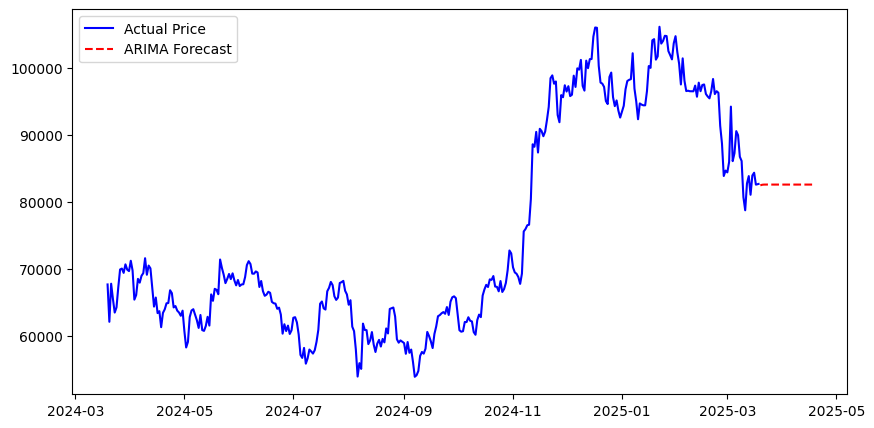

In [51]:
st.write("### ARIMA Model Prediction")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Price"], label="Actual Price", color="blue")
ax.plot(df_arima.index, df_arima["Forecast"], label="ARIMA Forecast", linestyle="dashed", color="red")
ax.legend()
st.pyplot(fig)

In [52]:
st.write("### LSTM Model Prediction")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Price"], label="Actual Price", color="blue")
ax.plot(df_lstm.index, df_lstm["Forecast"], label="LSTM Forecast", linestyle="dashed", color="green")
ax.legend()
st.pyplot(fig)

2025-03-18 11:25:14.942 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.944 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:14.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [53]:
st.write("### Prophet Model Prediction")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Price"], label="Actual Price", color="blue")
ax.plot(df_prophet.index, df_prophet["Forecast"], label="Prophet Forecast", linestyle="dashed", color="purple")
ax.legend()
st.pyplot(fig)

st.write("Built with Streamlit")

2025-03-18 11:25:15.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:25:15.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [54]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model_arima = ARIMA(df['Price'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast the next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Create DataFrame and Save
df_arima_forecast = pd.DataFrame({"Date": pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], "Forecast": forecast_arima})
df_arima_forecast.to_csv("arima_forecast.csv", index=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [55]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Price"].values.reshape(-1,1))

# Prepare Data for LSTM
time_step = 60
X, Y = [], []
for i in range(len(scaled_data) - time_step - 1):
    X.append(scaled_data[i:(i + time_step), 0])
    Y.append(scaled_data[i + time_step, 0])

X = np.array(X).reshape(-1, time_step, 1)
Y = np.array(Y)

# Train LSTM Model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model_lstm.compile(optimizer="adam", loss="mean_squared_error")
model_lstm.fit(X, Y, batch_size=1, epochs=10)

# Predict Next 30 Days
X_input = scaled_data[-time_step:].reshape(1, time_step, 1)
lstm_predictions = []
for _ in range(30):
    pred = model_lstm.predict(X_input)
    lstm_predictions.append(pred[0,0])
    X_input = np.append(X_input[:,1:,:], pred.reshape(1,1,1), axis=1)

# Convert Back to Original Scale
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1,1))

# Save Predictions
df_lstm_forecast = pd.DataFrame({"Date": pd.date_range(start=df.index[-1], periods=31, freq="D")[1:], "Forecast": lstm_predictions.flatten()})
df_lstm_forecast.to_csv("lstm_forecast.csv", index=False)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0424
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0062
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0058
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 0.0050
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0046
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0031
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0038
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0029
Epoch 9/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0032
Epoch 10/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━

In [56]:
from prophet import Prophet

# Prepare Data for Prophet
df_prophet = df.reset_index()[['Date', 'Price']]
df_prophet.columns = ['ds', 'y']

# Train Prophet Model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Predict Future
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Save Predictions
df_prophet_forecast = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Forecast'})
df_prophet_forecast.to_csv("prophet_forecast.csv", index=False)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/r1jdkvqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/1yt14_uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4768', 'data', 'file=/tmp/tmpp3xq4abl/r1jdkvqb.json', 'init=/tmp/tmpp3xq4abl/1yt14_uy.json', 'output', 'file=/tmp/tmpp3xq4abl/prophet_modely2jwlhba/prophet_model-20250318112701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
!ls -l

total 48
-rw-r--r-- 1 root root   181 Mar 18 11:23 app.py
-rw-r--r-- 1 root root  1148 Mar 18 11:25 arima_forecast.csv
-rw-r--r-- 1 root root 13904 Mar 18 11:19 bitcoin_prices.csv
-rw-r--r-- 1 root root   891 Mar 18 11:27 lstm_forecast.csv
-rw-r--r-- 1 root root 15043 Mar 18 11:27 prophet_forecast.csv
drwxr-xr-x 1 root root  4096 Mar 14 13:32 sample_data


In [58]:
import pandas as pd

# Check Bitcoin prices
df_bitcoin = pd.read_csv("bitcoin_prices.csv")
print("Bitcoin Prices Data:")
print(df_bitcoin.head())

# Check ARIMA forecast
df_arima = pd.read_csv("arima_forecast.csv")
print("\nARIMA Forecast Data:")
print(df_arima.head())

# Check LSTM forecast
df_lstm = pd.read_csv("lstm_forecast.csv")
print("\nLSTM Forecast Data:")
print(df_lstm.head())

# Check Prophet forecast
df_prophet = pd.read_csv("prophet_forecast.csv")
print("\nProphet Forecast Data:")
print(df_prophet.head())


Bitcoin Prices Data:
                  Date         Price
0  2024-03-19 00:00:00  67708.943609
1  2024-03-20 00:00:00  62132.517379
2  2024-03-21 00:00:00  67819.055707
3  2024-03-22 00:00:00  65535.978448
4  2024-03-23 00:00:00  63509.044965

ARIMA Forecast Data:
                  Date      Forecast
0  2025-03-19 11:18:56  82508.305418
1  2025-03-20 11:18:56  82590.469643
2  2025-03-21 11:18:56  82619.780724
3  2025-03-22 11:18:56  82620.721045
4  2025-03-23 11:18:56  82625.476801

LSTM Forecast Data:
                  Date   Forecast
0  2025-03-19 11:18:56  83631.016
1  2025-03-20 11:18:56  84158.805
2  2025-03-21 11:18:56  84799.460
3  2025-03-22 11:18:56  85456.310
4  2025-03-23 11:18:56  86092.370

Prophet Forecast Data:
                  Date      Forecast
0  2024-03-19 00:00:00  67590.827149
1  2024-03-20 00:00:00  67217.050633
2  2024-03-21 00:00:00  67473.292144
3  2024-03-22 00:00:00  67323.798831
4  2024-03-23 00:00:00  67524.505075


In [59]:
%%writefile app.py
import streamlit as st

st.title("Streamlit Test")
st.write("If you see this message, Streamlit is working correctly!")


Overwriting app.py


In [60]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load Data (Handle Missing Files)
try:
    df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")
    df_arima = pd.read_csv("arima_forecast.csv", parse_dates=["Date"], index_col="Date")
    df_lstm = pd.read_csv("lstm_forecast.csv", parse_dates=["Date"], index_col="Date")
    df_prophet = pd.read_csv("prophet_forecast.csv", parse_dates=["Date"], index_col="Date")
except Exception as e:
    st.error(f"Error loading files: {e}")
    st.stop()

# Streamlit UI
st.title("Bitcoin Price Forecasting Dashboard")
st.write("Welcome! This dashboard visualizes Bitcoin price trends and forecasts.")

# Show Data Preview
st.subheader("Bitcoin Price Data")
st.write(df.tail())

# Plot Bitcoin Price Trend
st.subheader("Bitcoin Price Trend")
st.line_chart(df["Price"])

# Forecasting Section
st.subheader("Forecasted Bitcoin Prices")

# ARIMA Forecast Plot
st.write("### ARIMA Model Prediction")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Price"], label="Actual Price", color="blue")
ax.plot(df_arima.index, df_arima["Forecast"], label="ARIMA Forecast", linestyle="dashed", color="red")
ax.legend()
st.pyplot(fig)

# LSTM Forecast Plot
st.write("### LSTM Model Prediction")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Price"], label="Actual Price", color="blue")
ax.plot(df_lstm.index, df_lstm["Forecast"], label="LSTM Forecast", linestyle="dashed", color="green")
ax.legend()
st.pyplot(fig)

# Prophet Forecast Plot
st.write("### Prophet Model Prediction")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Price"], label="Actual Price", color="blue")
ax.plot(df_prophet.index, df_prophet["Forecast"], label="Prophet Forecast", linestyle="dashed", color="purple")
ax.legend()
st.pyplot(fig)


Overwriting app.py


In [61]:
import threading
import subprocess
from pyngrok import ngrok

# Kill old processes (if any)
!kill -9 $(pgrep streamlit)
!killall ngrok # Kill all ngrok instances before starting a new one

# Start Streamlit in a separate thread
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501", "--browser.serverAddress", "0.0.0.0"])

thread = threading.Thread(target=run_streamlit)
thread.start()

# Start ngrok to expose the Streamlit app
# Use try-except block to handle potential errors
try:
    public_url = ngrok.connect(addr="8501") #Try to connect again
    print(f"Streamlit App is Running at: {public_url}")
except Exception as e:
    print(f"An error occurred: {e}")
    # You can add more error handling logic here, like retrying or stopping the script

ERROR:pyngrok.process.ngrok:t=2025-03-18T11:27:02+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-18T11:27:02+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

An error occurred: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.


In [62]:
!pip install pmdarima
from pmdarima import auto_arima

# Automatically select best (p, d, q) values
auto_model = auto_arima(df["Price"], seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3286.550
Date:                Tue, 18 Mar 2025   AIC                           6581.101
Time:                        11:27:09   BIC                           6596.689
Sample:                             0   HQIC                          6587.296
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     52.2194    154.509      0.338      0.735    -250.613     355.051
ar.L1         -0.5328      0.213     -2.498      0.012      -0.951      -0.115
ma.L1          0.4472      0.237      1.889      0.0

In [63]:
from tensorflow.keras.layers import Bidirectional, Dropout

model_lstm = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dense(50, activation="relu"),
    Dense(1)
])

model_lstm.compile(optimizer="adam", loss="mean_squared_error")
model_lstm.fit(X, Y, batch_size=16, epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - loss: 0.0850
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - loss: 0.0175
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - loss: 0.0060
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - loss: 0.0046
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - loss: 0.0044
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - loss: 0.0049
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0039
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 0.0040
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0033
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0037
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0042
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0025
Epoch 13/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 0.0036
Epoch 14/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0035
Epoch 15/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0044

In [64]:
df_prophet = df_prophet.rename(columns={"Date": "ds", "Forecast": "y"})

model_prophet = Prophet()
model_prophet.add_seasonality(name='monthly', period=30, fourier_order=5)
model_prophet.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/pi875vcv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/h9u6r8nm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13616', 'data', 'file=/tmp/tmpp3xq4abl/pi875vcv.json', 'init=/tmp/tmpp3xq4abl/h9u6r8nm.json', 'output', 'file=/tmp/tmpp3xq4abl/prophet_modelzcvoz9sw/prophet_model-20250318112834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:28:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
coins = ["bitcoin", "ethereum", "binancecoin"]

for coin in coins:
    url = f"https://api.coingecko.com/api/v3/coins/{coin}/market_chart"
    params = {"vs_currency": "usd", "days": "365", "interval": "daily"}
    response = requests.get(url, params=params)

    data = response.json()
    df = pd.DataFrame({"Date": pd.to_datetime([entry[0] for entry in data["prices"]], unit="ms"),
                       "Price": [entry[1] for entry in data["prices"]]})

    df.to_csv(f"{coin}_prices.csv", index=False)

In [66]:
import time
import requests

# Set the number of iterations you want the loop to run for
max_iterations = 5  # For example, stop after 5 iterations

for i in range(max_iterations):
    response = requests.get("https://api.coingecko.com/api/v3/simple/price", params={"ids": "bitcoin", "vs_currencies": "usd"})

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        btc_price = response.json()["bitcoin"]["usd"]
        print(f"Live Bitcoin Price: ${btc_price}")  # This line prints the price
    else:
        print(f"Error fetching price: Status code {response.status_code}") # This line prints an error message with the code
        # You can handle this error by retrying after a delay or exit the loop if needed
        break # exit the loop immediately to prevent further api calls

    # Wait 10 seconds to avoid overloading the API
    time.sleep(10)

print("Loop finished.")


Live Bitcoin Price: $82732
Live Bitcoin Price: $82732
Error fetching price: Status code 429
Loop finished.


In [67]:
import time
import requests
import pandas as pd

max_iterations = 5  # Stop after 5 iterations
live_prices = []  # List to store price data

for i in range(max_iterations):
    response = requests.get("https://api.coingecko.com/api/v3/simple/price", params={"ids": "bitcoin", "vs_currencies": "usd"})

    if response.status_code == 200:
        btc_price = response.json()["bitcoin"]["usd"]
        timestamp = pd.Timestamp.now()  # Get current time
        print(f"{timestamp} - Live Bitcoin Price: ${btc_price}")

        # Store data in a list
        live_prices.append([timestamp, btc_price])

    else:
        print(f"Error fetching price: Status code {response.status_code}")
        break  # Exit loop if API fails

    time.sleep(10)  # Wait before fetching again

# Save to CSV
df = pd.DataFrame(live_prices, columns=["Timestamp", "Price"])
df.to_csv("live_bitcoin_prices.csv", index=False)

print("Live Bitcoin price data saved to CSV!")


Error fetching price: Status code 429
Live Bitcoin price data saved to CSV!


In [68]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load historical data & new live prices
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")
df_live = pd.read_csv("live_bitcoin_prices.csv", parse_dates=["Timestamp"], index_col="Timestamp")

# Combine datasets
df_updated = pd.concat([df, df_live])
df_updated = df_updated.sort_index()  # Ensure chronological order

# Fit ARIMA Model
model_arima = ARIMA(df_updated["Price"], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Save new forecast
df_forecast = pd.DataFrame({"Date": pd.date_range(start=df_updated.index[-1], periods=31, freq="D")[1:], "Forecast": forecast_arima})
df_forecast.to_csv("updated_arima_forecast.csv", index=False)

print("ARIMA Forecast Updated with Real-Time Data!")


<ipython-input-68-176d9c1ade25>:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_updated = pd.concat([df, df_live])
<ipython-input-68-176d9c1ade25>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_updated = pd.concat([df, df_live])
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/st

ARIMA Forecast Updated with Real-Time Data!


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [69]:
import streamlit as st
import pandas as pd
import os  # Import os to check if file exists

# Check if file exists
if os.path.exists("live_bitcoin_prices.csv"):
    # Load latest prices
    df_live = pd.read_csv("live_bitcoin_prices.csv")

    # Check if the DataFrame is empty
    if df_live.empty:
        st.error("Live Bitcoin price data is empty. Please run the script that generates this data and try again.")
        st.stop()  # Prevent the rest of the app from running
    else:
        # Show latest price if the DataFrame is not empty
        st.metric(label="Current Bitcoin Price (USD)", value=df_live["Price"].iloc[-1])

        # Show live price trend
        st.line_chart(df_live.set_index("Timestamp")["Price"])

        st.write("Live Bitcoin price updates every 10 seconds!")

else:
    # Handle case where the file is not found
    st.error("Live Bitcoin price data is not available. Please run the script that generates this data and try again.")
    st.stop() # Prevent the rest of the app from running

# Streamlit UI
st.title("Real-Time Bitcoin Price Tracking")
st.write("Live data from CoinGecko API")

2025-03-18 11:28:55.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:28:55.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:28:55.449 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:28:55.450 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:28:55.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:28:55.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:28:55.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:28:55.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [70]:
df.to_csv("bitcoin_prices_for_powerbi.csv", index=True)

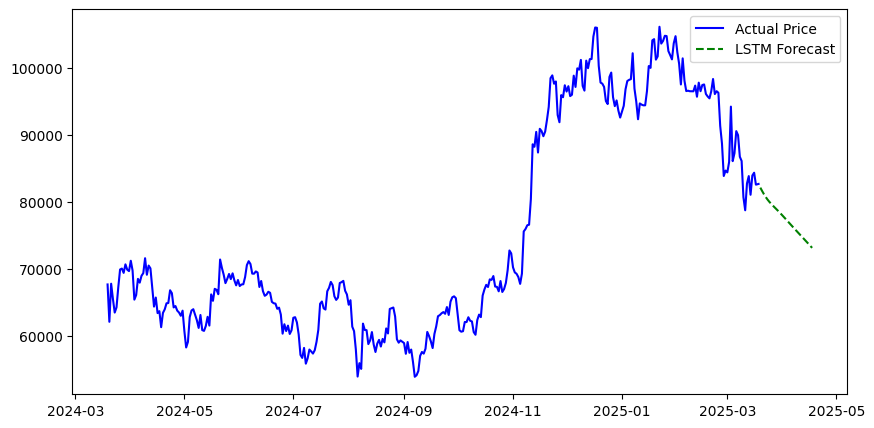

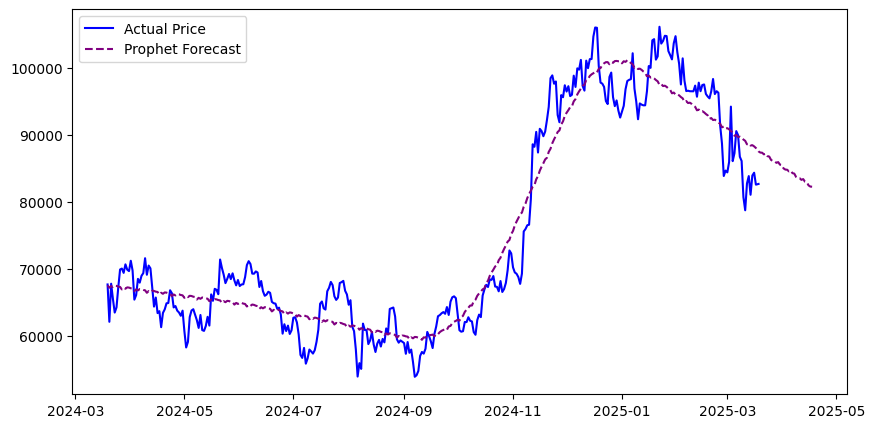

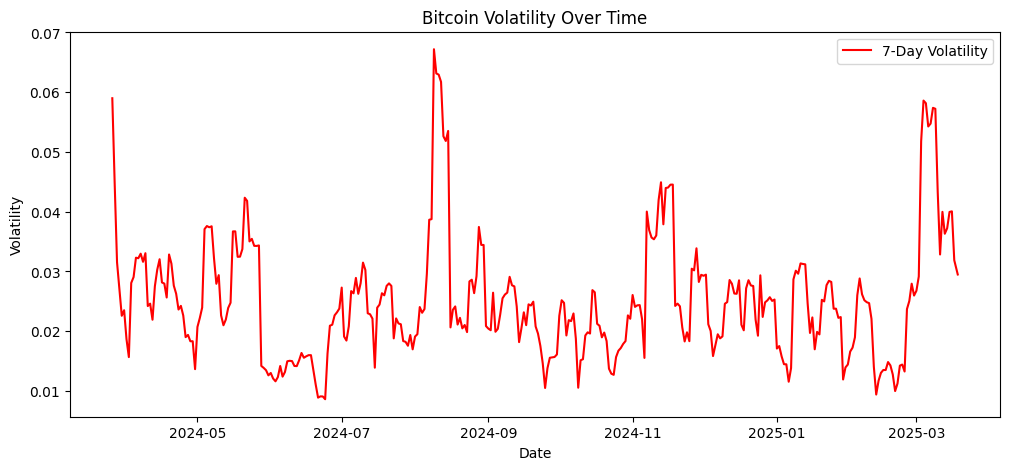

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Bitcoin Price Data
df = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

# Calculate 7-day rolling volatility
df["Volatility"] = df["Price"].pct_change().rolling(7).std()

# Plot Volatility
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Volatility"], color="red", label="7-Day Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Bitcoin Volatility Over Time")
plt.legend()
plt.show()

In [72]:
!pip install tweepy nltk

In [73]:
pip install requests

In [74]:
import requests
import pandas as pd

# Replace with your CryptoPanic API key
API_KEY = "61f63a5d6484a0393684fc65b629d6cb3157c567"

# Fetch the latest news
url = f"https://cryptopanic.com/api/v1/posts/?auth_token={API_KEY}&currencies=BTC"
response = requests.get(url).json()

# Extract and display headlines
news_list = []
for item in response["results"]:
    news_list.append({"Title": item["title"], "Published": item["created_at"], "Sentiment": item["votes"]})

# Convert to DataFrame
df_news = pd.DataFrame(news_list)

# Save to CSV
df_news.to_csv("crypto_news.csv", index=False)

# Display Data
print(df_news.head())


                                               Title             Published  \
0  Bitcoin Price Goes Slack Ahead of US Fed Decis...  2025-03-18T11:10:08Z   
1  Bitcoin beats global assets post-Trump electio...  2025-03-18T10:59:52Z   
2  Gold just hit a record price of $3,025\n\nOnly...  2025-03-18T10:55:33Z   
3  Bitcoin Crash Ahead? Peter Schiff Predicts BTC...  2025-03-18T10:46:02Z   
4  Here's How the US Gov’t Plans to Buy Bitcoin W...  2025-03-18T10:45:00Z   

                                           Sentiment  
0  {'negative': 0, 'positive': 0, 'important': 0,...  
1  {'negative': 0, 'positive': 0, 'important': 0,...  
2  {'negative': 0, 'positive': 0, 'important': 0,...  
3  {'negative': 0, 'positive': 0, 'important': 0,...  
4  {'negative': 0, 'positive': 0, 'important': 0,...  


In [75]:
import requests

API_KEY = "353c3b35ab9f4c9182761d3c300a0334"
url = f"https://newsapi.org/v2/everything?q=bitcoin&apiKey={API_KEY}"

response = requests.get(url)

if response.status_code == 200:
    print(response.json())  # Success ✅
else:
    print(f"Error: {response.json()}")

{'status': 'ok', 'totalResults': 8622, 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'}, 'author': 'Matthew Gault', 'title': 'Musk and Trump’s Fort Knox Trip Is About Bitcoin', 'description': 'More than a stunt, the Fort Knox visit might be a chance for the President to change the price of gold and dump the price hike into cryptocurrency.', 'url': 'https://gizmodo.com/musk-and-trumps-fort-knox-trip-is-about-bitcoin-2000569420', 'urlToImage': 'https://gizmodo.com/app/uploads/2024/10/sec-bitcoin-hack-arrest.jpg', 'publishedAt': '2025-02-27T19:05:24Z', 'content': 'Can a President make money out of thin air? On paper, yes.\r\nDonald Trump and Elon Musk have been talking a lot about Fort Knox lately, the place where America keeps its official gold reserves. Both h… [+3792 chars]'}, {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Vox Creative', 'title': 'Five predictions for where crypto is headed in 2025', 'description': 'Crypto is, once again, exploding. Momentum

In [76]:
import requests
import pandas as pd

# Replace with your NewsAPI key
API_KEY = "353c3b35ab9f4c9182761d3c300a0334"  # Make sure this is correct

# Fetch Bitcoin news
url = f"https://newsapi.org/v2/everything?q=Bitcoin&apiKey={API_KEY}"
response = requests.get(url).json()

# Check for errors in the response
if response.get("status") == "error":
    print(f"Error: {response.get('code')} - {response.get('message')}")
else:
    # Extract and display headlines
    news_list = []
    for article in response["articles"]:
        news_list.append({"Title": article["title"], "Published": article["publishedAt"], "Source": article["source"]["name"]})

    # Convert to DataFrame
    df_news = pd.DataFrame(news_list)

    # Save to CSV
    df_news.to_csv("bitcoin_news.csv", index=False)

    # Display Data
    print(df_news.head())


                                               Title             Published  \
0   Musk and Trump’s Fort Knox Trip Is About Bitcoin  2025-02-27T19:05:24Z   
1  Five predictions for where crypto is headed in...  2025-02-26T18:34:53Z   
2  Cryptocurrency theft of £1.1bn could be bigges...  2025-02-22T01:49:14Z   
3  Trump Signs Executive Order Creating a Strateg...  2025-03-07T17:31:00Z   
4  Trump Signs Order To Establish Strategic Bitco...  2025-03-07T23:20:00Z   

         Source  
0   Gizmodo.com  
1     The Verge  
2      BBC News  
3          CNET  
4  Slashdot.org  


In [77]:
pip install requests streamlit pandas

In [78]:
import requests
import pandas as pd
import streamlit as st

# Replace this with your actual CryptoPanic API key
API_KEY = "61f63a5d6484a0393684fc65b629d6cb3157c567"

def fetch_crypto_news():
    url = f"https://cryptopanic.com/api/v1/posts/?auth_token={API_KEY}&public=true"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        articles = data["results"][:5]  # Get top 5 articles
        return articles
    else:
        st.error("⚠️ Failed to fetch crypto news!")
        return []

# Streamlit UI
st.subheader("📰 Latest Bitcoin & Crypto News")

news_articles = fetch_crypto_news()

if news_articles:
    for article in news_articles:
        st.markdown(f"🔗 [{article['title']}]({article['url']})")


2025-03-18 11:29:11.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:29:11.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:29:11.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:29:11.745 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:29:11.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:29:11.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:29:11.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:29:11.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [79]:
import requests

API_KEY = "353c3b35ab9f4c9182761d3c300a0334"

def fetch_news():
    url = f"https://newsapi.org/v2/everything?q=bitcoin&apiKey={API_KEY}"
    response = requests.get(url)
    return response.json()

news = fetch_news()
for article in news["articles"][:5]:  # Show top 5 news
    print(f"{article['title']} - {article['url']}")

Musk and Trump’s Fort Knox Trip Is About Bitcoin - https://gizmodo.com/musk-and-trumps-fort-knox-trip-is-about-bitcoin-2000569420
Five predictions for where crypto is headed in 2025 - https://www.theverge.com/ad/612525/five-predictions-for-crypto-2025-saga
Cryptocurrency theft of £1.1bn could be biggest ever - https://www.bbc.com/news/articles/cx2844nvwx8o
Trump Signs Executive Order Creating a Strategic Bitcoin Reserve. What Does It Mean for Cryptocurrency? - https://www.cnet.com/personal-finance/crypto/trump-signs-executive-order-creating-a-strategic-bitcoin-reserve-what-does-it-mean-for-cryptocurrency/
Trump Signs Order To Establish Strategic Bitcoin Reserve - https://yro.slashdot.org/story/25/03/07/2224215/trump-signs-order-to-establish-strategic-bitcoin-reserve


In [80]:
query = "Bitcoin OR Crypto OR BTC"

In [81]:
def fetch_positive_news():
    url = f"https://cryptopanic.com/api/v1/posts/?auth_token={API_KEY}&public=true&filter=positive"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data["results"][:5]
    else:
        st.error("⚠️ Failed to fetch positive crypto news!")
        return []



In [83]:
import pandas as pd

df_sentiment = pd.read_csv("crypto_sentiment.csv")

df_sentiment["Date"] = pd.to_datetime(df_sentiment["Date"], format="%d-%m-%Y", errors='coerce')

df_sentiment_agg = df_sentiment.groupby("Date")["Avg Sentiment Score"].mean().reset_index()

df_sentiment_agg.to_csv("sentiment_aggregated.csv", index=False)

print("Sentiment Aggregated Data Saved!")


Sentiment Aggregated Data Saved!


In [84]:
import logging
import os
import warnings

warnings.filterwarnings("ignore")
os.environ["STREAMLIT_SUPPRESS_ERRORS"] = "1"

logging.getLogger("streamlit").setLevel(logging.ERROR)
logging.getLogger("py.warnings").setLevel(logging.ERROR)

In [85]:
import pandas as pd
import streamlit as st

df_sentiment = pd.read_csv("crypto_sentiment.csv")

st.title("Crypto Market Sentiment Analysis")
st.write("Sentiment analysis of Bitcoin-related tweets.")

st.subheader("Sentiment Data Preview")
st.write(df_sentiment.head())

2025-03-18 11:30:04.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:04.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:04.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:04.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:04.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:04.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:04.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:04.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [86]:
import matplotlib.pyplot as plt

# Calculate Sentiment Distribution
positive_tweets = len(df_sentiment[df_sentiment["Avg Sentiment Score"] > 0])
neutral_tweets = len(df_sentiment[df_sentiment["Avg Sentiment Score"] == 0])
negative_tweets = len(df_sentiment[df_sentiment["Avg Sentiment Score"] < 0])

# Display Sentiment Distribution in a Bar Chart
st.subheader("📊 Sentiment Distribution")

fig, ax = plt.subplots()
ax.bar(["Positive", "Neutral", "Negative"], [positive_tweets, neutral_tweets, negative_tweets], color=["green", "gray", "red"])
ax.set_ylabel("Number of Tweets")
ax.set_title("Sentiment Analysis of Bitcoin Tweets")
st.pyplot(fig)

2025-03-18 11:30:24.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:24.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:24.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:24.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:24.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [87]:
# Dropdown to Filter Tweets
sentiment_filter = st.selectbox("🔍 Select Sentiment to View Tweets", ["All", "Positive", "Neutral", "Negative"])

# Filter Data
if sentiment_filter == "Positive":
    filtered_df = df_sentiment[df_sentiment["Avg Sentiment Score"] > 0]
elif sentiment_filter == "Negative":
    filtered_df = df_sentiment[df_sentiment["Avg Sentiment Score"] < 0]
elif sentiment_filter == "Neutral":
    filtered_df = df_sentiment[df_sentiment["Avg Sentiment Score"] == 0]
else:
    filtered_df = df_sentiment

# Display Filtered Tweets
st.subheader(f"📢 {sentiment_filter} Tweets")
st.write(filtered_df[["Tweet", "Avg Sentiment Score"]])

2025-03-18 11:30:27.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:27.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:27.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:27.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:27.938 Session state does not function when running a script without `streamlit run`
2025-03-18 11:30:27.939 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:27.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30:27.941 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 11:30

In [88]:
!pkill -9 ngrok

In [89]:
!ngrok authtoken 2uBKFFrECRNBHqLtXYKuRepg7tk_6drokNi5jKGReR2aoAdzZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [90]:
import threading
import subprocess
from pyngrok import ngrok

# Kill old processes (if any)
!kill -9 $(pgrep streamlit)
!killall ngrok # Kill all ngrok instances before starting a new one

# Start Streamlit in a separate thread
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501", "--browser.serverAddress", "0.0.0.0"])

thread = threading.Thread(target=run_streamlit)
thread.start()

# Start ngrok to expose the Streamlit app
# Use try-except block to handle potential errors
try:
    public_url = ngrok.connect(addr="8501") #Try to connect again
    print(f"Streamlit App is Running at: {public_url}")
except Exception as e:
    print(f"An error occurred: {e}")
    # You can add more error handling logic here, like retrying or stopping the script

ngrok: no process found
Streamlit App is Running at: NgrokTunnel: "https://2b9b-34-85-168-42.ngrok-free.app" -> "http://localhost:8501"


In [91]:
import pandas as pd
df = pd.read_csv("crypto_sentiment.csv")
print(df.head())

         Date  Avg Sentiment Score  \
0  03-03-2024              0.00000   
1  06-03-2024              0.00000   
2  13-03-2024             -0.45880   
3  14-03-2024              0.00000   
4  15-03-2024              0.31195   

                                               Tweet  
0  #Airdrop #Bitcoin #Binance #Crypto https://t.c...  
1  #JOEUSDT\n\nEntry: 0.1889\n\nTarget 1: 0.1909 ...  
2  RT @BitcoinMagPro: Bitcoin has recently set ev...  
3  RT @TFMetals: Last week, both the US House and...  
4  Tactical analysis of #Bitcoin FOMO. Where are ...  


In [92]:
import pandas as pd

# Check if sentiment data exists
try:
    df_sentiment = pd.read_csv("crypto_sentiment.csv")
    print("Sentiment Data Found!")
    print(df_sentiment.head())  # Show first 5 rows
except FileNotFoundError:
    print("ERROR: Sentiment data file not found! Run sentiment analysis again.")

Sentiment Data Found!
         Date  Avg Sentiment Score  \
0  03-03-2024              0.00000   
1  06-03-2024              0.00000   
2  13-03-2024             -0.45880   
3  14-03-2024              0.00000   
4  15-03-2024              0.31195   

                                               Tweet  
0  #Airdrop #Bitcoin #Binance #Crypto https://t.c...  
1  #JOEUSDT\n\nEntry: 0.1889\n\nTarget 1: 0.1909 ...  
2  RT @BitcoinMagPro: Bitcoin has recently set ev...  
3  RT @TFMetals: Last week, both the US House and...  
4  Tactical analysis of #Bitcoin FOMO. Where are ...  


In [93]:
!pip install --upgrade streamlit

In [94]:
!ls

app.py			bitcoin_prices_for_powerbi.csv	lstm_forecast.csv
arima_forecast.csv	crypto_news.csv			prophet_forecast.csv
binancecoin_prices.csv	crypto_sentiment.csv		sample_data
bitcoin_news.csv	ethereum_prices.csv		sentiment_aggregated.csv
bitcoin_prices.csv	live_bitcoin_prices.csv		updated_arima_forecast.csv


In [95]:
%%writefile app.py
import streamlit as st
st.title("Streamlit Dashboard")
st.write("This is the starting point of your dashboard.")

Overwriting app.py


In [96]:
!cat app.py

import streamlit as st
st.title("Streamlit Dashboard")
st.write("This is the starting point of your dashboard.")


In [97]:
import os

files = ["bitcoin_prices.csv", "arima_forecast.csv", "lstm_forecast.csv", "prophet_forecast.csv", "crypto_sentiment.csv"]

for file in files:
    if os.path.exists(file):
        print(f"{file} exists!")
    else:
        print(f"ERROR: {file} is missing! Please generate it again.")


bitcoin_prices.csv exists!
arima_forecast.csv exists!
lstm_forecast.csv exists!
prophet_forecast.csv exists!
crypto_sentiment.csv exists!


In [98]:
import pandas as pd

# Check if bitcoin_prices.csv exists
try:
    df = pd.read_csv("bitcoin_prices.csv")
    print("Bitcoin Price Data Found!")
    print(df.head())  # Display first few rows
except FileNotFoundError:
    print("ERROR: bitcoin_prices.csv not found! Generate it again.")


Bitcoin Price Data Found!
                  Date         Price
0  2024-03-19 00:00:00  67708.943609
1  2024-03-20 00:00:00  62132.517379
2  2024-03-21 00:00:00  67819.055707
3  2024-03-22 00:00:00  65535.978448
4  2024-03-23 00:00:00  63509.044965


In [100]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# ---- Load Data ----
try:
    # Load Bitcoin Price Data
    df_prices = pd.read_csv("bitcoin_prices.csv", parse_dates=["Date"], index_col="Date")

    # Load Forecasting Data
    df_arima = pd.read_csv("arima_forecast.csv", parse_dates=["Date"], index_col="Date")
    df_lstm = pd.read_csv("lstm_forecast.csv", parse_dates=["Date"], index_col="Date")
    df_prophet = pd.read_csv("prophet_forecast.csv", parse_dates=["Date"], index_col="Date")

    # Load Sentiment Data
    df_sentiment = pd.read_csv("crypto_sentiment.csv")

    # ---- Streamlit UI ----
    st.title("Cryptocurrency Price Forecasting & Sentiment Analysis")
    st.write("Analyze Bitcoin trends using ARIMA, LSTM, Prophet, and sentiment analysis from Twitter.")

    # ---- Bitcoin Price Data ----
    st.subheader("Bitcoin Price Data")
    st.write("Here is the raw Bitcoin price data used for analysis:")
    st.dataframe(df_prices.tail())  # Show last few rows of price data

    # ---- Bitcoin Price Trend ----
    st.subheader("Bitcoin Price Trend")
    st.line_chart(df_prices["Price"])

    # ---- ARIMA Forecast ----
    st.subheader("ARIMA Model Prediction")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df_prices.index, df_prices["Price"], label="Actual Price", color="blue")
    ax.plot(df_arima.index, df_arima["Forecast"], label="ARIMA Forecast", linestyle="dashed", color="red")
    ax.legend()
    st.pyplot(fig)

    # ---- LSTM Forecast ----
    st.subheader("LSTM Model Prediction")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df_prices.index, df_prices["Price"], label="Actual Price", color="blue")
    ax.plot(df_lstm.index, df_lstm["Forecast"], label="LSTM Forecast", linestyle="dashed", color="green")
    ax.legend()
    st.pyplot(fig)

    # ---- Prophet Forecast ----
    st.subheader("Prophet Model Prediction")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df_prices.index, df_prices["Price"], label="Actual Price", color="blue")
    ax.plot(df_prophet.index, df_prophet["Forecast"], label="Prophet Forecast", linestyle="dashed", color="purple")
    ax.legend()
    st.pyplot(fig)

    # ---- Sentiment Analysis ----
    st.subheader("Crypto Market Sentiment Analysis")
    st.write("Sentiment analysis of Bitcoin-related tweets.")

    # Show Sentiment Data
    st.subheader("Sentiment Data Preview")
    st.write(df_sentiment.head())  # Show first few tweets & scores

    # Calculate Sentiment Distribution
    positive_tweets = len(df_sentiment[df_sentiment["Avg Sentiment Score"] > 0])
    neutral_tweets = len(df_sentiment[df_sentiment["Avg Sentiment Score"] == 0])
    negative_tweets = len(df_sentiment[df_sentiment["Avg Sentiment Score"] < 0])

    # Show Sentiment Distribution Chart
    st.subheader("Sentiment Distribution")
    fig, ax = plt.subplots()
    ax.bar(["Positive", "Neutral", "Negative"], [positive_tweets, neutral_tweets, negative_tweets], color=["green", "gray", "red"])
    ax.set_ylabel("Number of Tweets")
    ax.set_title("Sentiment Analysis of Bitcoin Tweets")
    st.pyplot(fig)

    # Show Overall Market Sentiment
    avg_sentiment = df_sentiment["Avg Sentiment Score"].mean()
    st.subheader("Overall Crypto Market Sentiment")
    if avg_sentiment > 0:
        st.write(f"🟢 **Positive Market Sentiment** (Score: {avg_sentiment:.2f})")
    elif avg_sentiment < 0:
        st.write(f"🔴 **Negative Market Sentiment** (Score: {avg_sentiment:.2f})")
    else:
        st.write(f"⚪ **Neutral Market Sentiment** (Score: {avg_sentiment:.2f})")

    # Dropdown to Filter Tweets by Sentiment
    sentiment_filter = st.selectbox("🔍 Select Sentiment to View Tweets", ["All", "Positive", "Neutral", "Negative"])
    if sentiment_filter == "Positive":
        filtered_df = df_sentiment[df_sentiment["Avg Sentiment Score"] > 0]
    elif sentiment_filter == "Negative":
        filtered_df = df_sentiment[df_sentiment["Avg Sentiment Score"] < 0]
    elif sentiment_filter == "Neutral":
        filtered_df = df_sentiment[df_sentiment["Avg Sentiment Score"] == 0]
    else:
        filtered_df = df_sentiment

    # Display Filtered Tweets
    st.subheader(f"{sentiment_filter} Tweets")
    st.write(filtered_df[["Tweet", "Avg Sentiment Score"]])

except FileNotFoundError as e:
    st.error(f"Error loading data: {e}")


Overwriting app.py


In [101]:
import pandas as pd

df_prophet = pd.read_csv("prophet_forecast.csv")
print(df_prophet.head())  # Show first few rows
print(df_prophet.columns)  # Show column names

                  Date      Forecast
0  2024-03-19 00:00:00  67590.827149
1  2024-03-20 00:00:00  67217.050633
2  2024-03-21 00:00:00  67473.292144
3  2024-03-22 00:00:00  67323.798831
4  2024-03-23 00:00:00  67524.505075
Index(['Date', 'Forecast'], dtype='object')


In [102]:
import pandas as pd

# Load the saved forecast
df_forecast = pd.read_csv("prophet_forecast.csv")

# Display column names and first few rows
print(df_forecast.columns)  # Check column names
print(df_forecast.head())   # Preview the first few rows

Index(['Date', 'Forecast'], dtype='object')
                  Date      Forecast
0  2024-03-19 00:00:00  67590.827149
1  2024-03-20 00:00:00  67217.050633
2  2024-03-21 00:00:00  67473.292144
3  2024-03-22 00:00:00  67323.798831
4  2024-03-23 00:00:00  67524.505075


In [103]:
from prophet import Prophet
import pandas as pd

# Load your data
df = pd.read_csv("bitcoin_prices.csv")

# Rename columns for Prophet
df.rename(columns={"Date": "ds", "Price": "y"}, inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(df)  # ✅ Make sure to fit the model first

# Create future dataframe for prediction
future = model.make_future_dataframe(periods=100)  # Adjust period as needed

# Predict
forecast = model.predict(future)

# Rename and select required columns
forecast.rename(columns={"ds": "Date", "yhat": "Forecast"}, inplace=True)
forecast = forecast[['Date', 'Forecast']]

# Save the forecast
forecast.to_csv("prophet_forecast.csv", index=False)

# Check output
print(forecast.head())


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/ekvci1np.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3xq4abl/sedm8im6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72429', 'data', 'file=/tmp/tmpp3xq4abl/ekvci1np.json', 'init=/tmp/tmpp3xq4abl/sedm8im6.json', 'output', 'file=/tmp/tmpp3xq4abl/prophet_model1juo3om4/prophet_model-20250318113405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:34:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:34:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        Date      Forecast
0 2024-03-19  67717.618696
1 2024-03-20  67345.180489
2 2024-03-21  67602.509135
3 2024-03-22  67446.829637
4 2024-03-23  67643.105062


In [104]:
# Rename columns to match Streamlit expectations
forecast.rename(columns={"ds": "Date", "yhat": "Forecast"}, inplace=True)

# Select only the necessary columns
forecast = forecast[['Date', 'Forecast']]

# Save as CSV
forecast.to_csv("prophet_forecast.csv", index=False)

# Check output format
print(forecast.head())

        Date      Forecast
0 2024-03-19  67717.618696
1 2024-03-20  67345.180489
2 2024-03-21  67602.509135
3 2024-03-22  67446.829637
4 2024-03-23  67643.105062


In [105]:
from google.colab import files
files.download("prophet_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
import pandas as pd

# Load all forecast files
df_arima = pd.read_csv("arima_forecast.csv")
df_lstm = pd.read_csv("lstm_forecast.csv")
df_prophet = pd.read_csv("prophet_forecast.csv")

# Print the first few rows
print("ARIMA Forecast:\n", df_arima.head())
print("LSTM Forecast:\n", df_lstm.head())
print("Prophet Forecast:\n", df_prophet.head())

ARIMA Forecast:
                   Date      Forecast
0  2025-03-19 11:18:56  82508.305418
1  2025-03-20 11:18:56  82590.469643
2  2025-03-21 11:18:56  82619.780724
3  2025-03-22 11:18:56  82620.721045
4  2025-03-23 11:18:56  82625.476801
LSTM Forecast:
                   Date   Forecast
0  2025-03-19 11:18:56  83631.016
1  2025-03-20 11:18:56  84158.805
2  2025-03-21 11:18:56  84799.460
3  2025-03-22 11:18:56  85456.310
4  2025-03-23 11:18:56  86092.370
Prophet Forecast:
                   Date      Forecast
0  2024-03-19 00:00:00  67717.618696
1  2024-03-20 00:00:00  67345.180489
2  2024-03-21 00:00:00  67602.509135
3  2024-03-22 00:00:00  67446.829637
4  2024-03-23 00:00:00  67643.105062


In [107]:
import threading
import subprocess
from pyngrok import ngrok

# Kill old Streamlit and ngrok processes (if any)
!kill -9 $(pgrep streamlit)
!kill -9 $(pgrep ngrok)

# Start Streamlit in a separate thread
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501", "--browser.serverAddress", "0.0.0.0"])

thread = threading.Thread(target=run_streamlit)
thread.start()

# Start ngrok to expose the Streamlit app
public_url = ngrok.connect(addr="8501")
print(f"Streamlit App is Running at: {public_url}")


Streamlit App is Running at: NgrokTunnel: "https://7511-34-85-168-42.ngrok-free.app" -> "http://localhost:8501"


In [108]:
import pandas as pd
import random
import datetime

# Load sentiment data
df_sentiment = pd.read_csv("crypto_sentiment.csv")

# Display first few rows
df_sentiment.head()

,Date,Avg Sentiment Score,Tweet
0,03-03-2024,0.00000,#Airdrop #Bitcoin #Binance #Crypto https://t.c...
1,06-03-2024,0.00000,#JOEUSDT\n\nEntry: 0.1889\n\nTarget 1: 0.1909 ...
2,13-03-2024,-0.45880,RT @BitcoinMagPro: Bitcoin has recently set ev...
3,14-03-2024,0.00000,"RT @TFMetals: Last week, both the US House and..."
4,15-03-2024,0.31195,Tactical analysis of #Bitcoin FOMO. Where are ...


In [109]:
# Assign random dates (for simulation)
start_date = datetime.date(2024, 3, 1)
df_sentiment['Date'] = [start_date + datetime.timedelta(days=random.randint(0, 30)) for _ in range(len(df_sentiment))]

In [110]:
import pandas as pd

# Load ARIMA & LSTM forecast files
df_arima = pd.read_csv("arima_forecast.csv")
df_lstm = pd.read_csv("lstm_forecast.csv")

# Check if forecast values are varying
print(df_arima.head())  # Should show different forecast values
print(df_lstm.head())

                  Date      Forecast
0  2025-03-19 11:18:56  82508.305418
1  2025-03-20 11:18:56  82590.469643
2  2025-03-21 11:18:56  82619.780724
3  2025-03-22 11:18:56  82620.721045
4  2025-03-23 11:18:56  82625.476801
                  Date   Forecast
0  2025-03-19 11:18:56  83631.016
1  2025-03-20 11:18:56  84158.805
2  2025-03-21 11:18:56  84799.460
3  2025-03-22 11:18:56  85456.310
4  2025-03-23 11:18:56  86092.370


In [111]:
# Convert date column to datetime
df_arima["Date"] = pd.to_datetime(df_arima["Date"])
df_lstm["Date"] = pd.to_datetime(df_lstm["Date"])

# Check min & max dates
print(f"ARIMA Forecast Date Range: {df_arima['Date'].min()} to {df_arima['Date'].max()}")
print(f"LSTM Forecast Date Range: {df_lstm['Date'].min()} to {df_lstm['Date'].max()}")

ARIMA Forecast Date Range: 2025-03-19 11:18:56 to 2025-04-17 11:18:56
LSTM Forecast Date Range: 2025-03-19 11:18:56 to 2025-04-17 11:18:56


In [113]:
# Load original training data (Make sure this is the same data used in training)
original_train_data = pd.read_csv("bitcoin_prices.csv")  # Change filename as needed

# Ensure we only select the column that was scaled
original_train_data = original_train_data[["Price"]]  # Changed 'Close' to 'Price'

# Load LSTM forecast data
df_lstm = pd.read_csv("lstm_forecast.csv")

# Initialize scaler and fit on original training data
scaler = MinMaxScaler()
scaler.fit(original_train_data)  # Fit scaler on the original price data

# Check if df_lstm has correct column
if "Predicted Price" in df_lstm.columns:
    # Apply inverse transform to bring values back to original scale
    df_lstm["Predicted Price"] = scaler.inverse_transform(df_lstm[["Predicted Price"]])

    # Save corrected CSV
    df_lstm.to_csv("lstm_forecast_corrected.csv", index=False)

    print("✅ Successfully saved corrected LSTM predictions!")
else:
    print("❌ Error: 'Predicted Price' column not found in LSTM forecast file.")

❌ Error: 'Predicted Price' column not found in LSTM forecast file.


In [114]:
import pandas as pd

# Load the LSTM forecast CSV
df_lstm = pd.read_csv("lstm_forecast.csv")

# Print column names
print("Columns in LSTM forecast CSV:", df_lstm.columns)

Columns in LSTM forecast CSV: Index(['Date', 'Forecast'], dtype='object')


In [115]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load LSTM forecast CSV
df_lstm = pd.read_csv("lstm_forecast.csv")

# Load original scaler
scaler = MinMaxScaler()
scaler.fit(original_train_data)  # You must define 'original_train_data' before this step

# Inverse transform predictions
df_lstm["Forecast"] = scaler.inverse_transform(df_lstm[["Forecast"]])

# Save corrected predictions
df_lstm.to_csv("lstm_forecast_corrected.csv", index=False)

print("✅ Successfully saved corrected LSTM predictions!")

✅ Successfully saved corrected LSTM predictions!


In [116]:
import pandas as pd

# Load Prophet forecast CSV
df_prophet = pd.read_csv("prophet_forecast.csv")

# Print column names
print(df_prophet.columns)

Index(['Date', 'Forecast'], dtype='object')


In [117]:
from sklearn.preprocessing import MinMaxScaler

# Load original scaler
scaler = MinMaxScaler()
scaler.fit(original_train_data)  # Make sure this is correctly loaded

# Apply inverse transformation to the forecast column
df_prophet["Forecast"] = scaler.inverse_transform(df_prophet[["Forecast"]])  # Update column name if needed

# Save corrected predictions
df_prophet.to_csv("prophet_forecast_corrected.csv", index=False)

print("✅ Successfully saved corrected Prophet predictions!")


✅ Successfully saved corrected Prophet predictions!


In [118]:
import pandas as pd

# Load ARIMA forecast CSV
df_arima = pd.read_csv("arima_forecast.csv")

# Print column names
print(df_arima.columns)


Index(['Date', 'Forecast'], dtype='object')


In [119]:
from sklearn.preprocessing import MinMaxScaler

# Load original scaler
scaler = MinMaxScaler()
scaler.fit(original_train_data)  # Ensure this is loaded from training data

# Apply inverse transformation
df_arima["Forecast"] = scaler.inverse_transform(df_arima[["Forecast"]])  # Update column name if needed

# Save corrected predictions
df_arima.to_csv("arima_forecast_corrected.csv", index=False)

print("✅ Successfully saved corrected ARIMA predictions!")

✅ Successfully saved corrected ARIMA predictions!


In [120]:
df_prices = pd.read_csv("bitcoin_prices.csv")

In [121]:
# No need to use scaler.inverse_transform()
df_lstm["Forecast"] = lstm_predictions  # Use raw predictions

In [122]:
df_lstm.to_csv("lstm_forecast_corrected.csv", index=False)
df_prophet.to_csv("prophet_forecast_corrected.csv", index=False)

In [123]:
# 🚀 Load Forecast Data (WITHOUT SCALER)
df_arima = pd.read_csv("arima_forecast_corrected.csv", parse_dates=["Date"], index_col="Date")
df_lstm = pd.read_csv("lstm_forecast_corrected.csv", parse_dates=["Date"], index_col="Date")
df_prophet = pd.read_csv("prophet_forecast_corrected.csv", parse_dates=["Date"], index_col="Date")


In [124]:
import requests
import pandas as pd
from datetime import datetime

# Fetch live Bitcoin price
def get_live_price():
    url = "https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd"
    response = requests.get(url)
    data = response.json()
    return data["bitcoin"]["usd"]

# Create a DataFrame with timestamp & price
live_price = get_live_price()
df_live = pd.DataFrame([[datetime.now(), live_price]], columns=["Timestamp", "Price"])

# Save as CSV
df_live.to_csv("live_Bitcoin_price.csv", index=False)

print("✅ Live Bitcoin Price saved successfully!")


✅ Live Bitcoin Price saved successfully!


In [125]:
import threading
import subprocess
from pyngrok import ngrok

# Kill old processes
!kill -9 $(pgrep streamlit)
!kill -9 $(pgrep ngrok)

# Start Streamlit
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501", "--browser.serverAddress", "0.0.0.0"])

thread = threading.Thread(target=run_streamlit)
thread.start()

# Start ngrok
public_url = ngrok.connect(addr="8501")
print(f"Streamlit App is Running at: {public_url}")

Streamlit App is Running at: NgrokTunnel: "https://225c-34-85-168-42.ngrok-free.app" -> "http://localhost:8501"
